[데이터 모델링, SQL 응용]
1. 제공해준 타이타닉 데이터에 대해 아래와 같은 작업을 수행하시오.
1) Pclass를 원핫인코딩
2) Age를 이산화(5개 구간으로 나눔)
3) embarked를 원핫인코딩

2. bins = [5, 20, 30, 40, 60, 90]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
타이타닉호 승객을 사망자와 생존자 그룹으로 나누고 각 그룹에 대해 '미성년자', '청년', '중년', '장년', '노년' 승객의 비율을 구한다. 각 그룹 별로 비율의 전체 합은 1이 되어야 한다.

In [1]:
import numpy as np
import pandas as pd

from numpy import NaN,nan,NAN
from pandas import DataFrame

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# One-hot incoding
pclass_oni = pd.get_dummies(df['Pclass'],prefix='Pclass')
pclass_oni
embarked_oni = pd.get_dummies(df['Embarked'],prefix='Embarked')
embarked_oni

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [11]:
# 원핫 인코딩 값 합치기
df_oni = pd.concat([df,pclass_oni,embarked_oni],axis=1)
df_oni

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,1,0,0


In [16]:
# Age컬럼 결측치 평균으로 채우기
df_oni['Age'] = df_oni['Age'].fillna(df_oni['Age'].mean())
df_oni['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [359]:
# 나이의 그룹에 맞춰 label달기
bins = [5, 20, 30, 40, 60, 90]
labels = ["미성년자", "청년", "중년", "장년", "노년"]

df_oni['Age_cut']=pd.cut(df_oni['Age'],bins=bins,labels=labels)
df_oni[['Age','Age_cut']]


,Age,Age_cut
0,22.000000,청년
1,38.000000,중년
2,26.000000,청년
3,35.000000,중년
4,35.000000,중년
...,...,...
886,27.000000,청년
887,19.000000,미성년자
888,29.699118,청년
889,26.000000,청년


In [376]:
# 생존자와 사망자로 나누기
d_age_rate=df_oni.groupby(['Survived','Age_cut'])[['Age']].size()[0]/df_oni.groupby(['Survived','Age_cut'])['Age'].size()[0].sum()
s_age_rate=df_oni.groupby(['Survived','Age_cut'])[['Age']].size()[1]/df_oni.groupby(['Survived','Age_cut'])['Age'].size()[1].sum()

In [377]:
# 각 시리즈의 이름을 지정해준 뒤 데이터프레임으로 변환
d_age_rate.name='Dead'
DataFrame(d_age_rate)
s_age_rate.name='Survived'
DataFrame(s_age_rate)

,Survived
Age_cut,
미성년자,0.163987
청년,0.437299
중년,0.221865
장년,0.160772
노년,0.016077


In [396]:
# 변환된 데이터프레임을 합치고 맨 아래에 합계행을 추가
sd_age_rate=DataFrame(pd.concat([d_age_rate,s_age_rate],axis=1)*100)

sd_age_rate.index=sd_age_rate.index.astype(str)
sd_age_rate.loc['합계']=sd_age_rate.sum(axis=0)
sd_age_rate

,Dead,Survived
Age_cut,,
미성년자,15.671642,16.398714
청년,50.559701,43.729904
중년,16.044776,22.186495
장년,14.552239,16.077170
노년,3.171642,1.607717
합계,100.000000,100.000000


[기초 알고리즘]
문제 1.
길이가 10인 1-벡터를 만드세요.
문제 2.
문제 1에서 만든 벡터에 대해 다섯번째 원소만 1이고 나머지 원소는 모두 0인 벡터를 만드세요.
문제 3.
10 부터 20까지의 값을 가지는 벡터를 만드세요.
문제 4.
위 벡터의 순서를 바꾸세요.
문제 5.
0부터 8까지의 값을 가지는 2x4 행렬을 만드세요.
문제 6.
벡터 [1,2,0,0,4,0] 에서 원소의 값이 짝수인 원소만 선택한 벡터를 만드세요.
문제 7.
2x2 단위 행렬(identity matrix)을 만드세요
문제 8.
난수 원소를 가지는 3x3 행렬을 만드세요
문제 9.
위에서 만든 난수 행렬에서 최대값 / 최소값 원소를 찾으세요.
문제 10.
위에서 만든 난수 행렬에서 행 평균, 열 평균을 계산하세요.

In [229]:
# 1
a = np.ones(10)
a

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [245]:
# 2
a=[np.zeros(10)]
a[0][4]=1
a

[array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])]

In [249]:
# 3
b = np.arange(21)

In [262]:
# 4
sorted(b, reverse=True)

[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [264]:
# 5
c = np.arange(8).reshape(2,4)
c

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [272]:
# 6
d = np.array([1,2,0,0,4,0])
d[b%2==0]

array([2, 0, 0, 4, 0])

In [271]:
# 7
e = np.identity(2)
e

array([[1., 0.],
       [0., 1.]])

In [280]:
# 8
f = np.random.random(9).reshape(3,3)
f

array([[0.89551703, 0.67830401, 0.9227702 ],
       [0.21598661, 0.75392413, 0.08477505],
       [0.53921028, 0.29771338, 0.72769603]])

In [282]:
# 9 
f.max()
f.min()

0.08477504572981442

In [284]:
# 10
f.mean(axis=1)  # 행 평균
f.mean(axis=0)  # 열 평귱

array([0.55023798, 0.57664718, 0.57841376])

[Microsoft R 서버를 활용한 빅데이터 분석]
import pandas as pd
import seaborn as sns
tips = sns.load_dataset("tips") 
1. 위 문장을 모두 수행한 후, 아래와 같은 요구사항을 구현하시오.
1) tips의 'sex‘ 컬럼의 타입을 문자열로 변환한 다음, info함수를 호출하여 결과를 확인하시오.

2) tips의 1,3,5,7번 index행에 저장된 tip 컬럼의 값을 모두 ‘missing'으로 변경하시오

3) scikitlearn에 있는 preprocessing 모듈중 표준화 및 정규화와 관련된 함수를 모두 기술하시오

2. 표준화와 정규화의 차이점을 설명하시오.

3. 데이터 분석을 위해 필요로 하는 라이브러리 및 용도를 기술하시오.

In [296]:
import pandas as pd
import seaborn as sns
tips = sns.load_dataset("tips")

# tips의 'sex‘ 컬럼의 타입을 문자열로 변환한 다음, info함수를 호출하여 결과를 확인하시오.
tips['sex']=tips['sex'].astype(str)
# tips.info()

# tips의 1,3,5,7번 index행에 저장된 tip 컬럼의 값을 모두 ‘missing'으로 변경하시오
tips.iloc[[1,3,5,7],1]='missing'
tips

# scikitlearn에 있는 preprocessing 모듈중 표준화 및 정규화와 관련된 함수를 모두 기술하시오
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

# 2. 표준화와 정규화의 차이점을 설명하시오.
'''
표준화 : 평균이 0, 표준편차가 1인 형태의 데이터로 재구성하는 것
정규화 : 특정 구간 사이의 값으로 데이터를 재구성하는 것 (0~1 사이의 값으로 MinMaxScaler ..)
'''

# 3. 데이터 분석을 위해 필요로 하는 라이브러리 및 용도를 기술하시오.
'''
numpy : 연산에 필요한 다양한 함수를 가지며, 배열을 벡터화시켜 계산하기 때문에 연산 속도가 매우 빨라진다.
pandas : 데이터프레임이라는 구조가 분석에 용이하기 때문에 데이터프레임을 만들고 핸들링하는 함수들이 들어있고, 다양한 파일들을 읽고 내보낸다.
sklearn : 데이터 전처리에 필요한 다양한 모듈과 함수들이 들어있다.
missingno : matrix함수를 이용해 결측치가 있는지 한 눈에 확인할 수 있다.
matplotlib : 데이터를 시각화 하는데 용이한 라이브러리이다.
seaborn : 다양한 형식의 그래프를 그릴 수 있다.
'''

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,missing,Male,No,Sun,Dinner,3
2,21.01,3.5,Male,No,Sun,Dinner,3
3,23.68,missing,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2,Female,Yes,Sat,Dinner,2
241,22.67,2,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


다음 실행 예시처럼 교환할 돈을 입력받아서, 최소한의 동전의 개수로 교환해 주는 파이썬 코드를 작성하시오.
바꿀 돈 -->7777
500원: 15 , 100원: 2 , 50원: 1 , 10원 2 , 나머지: 7

In [350]:
money = int(input('바꿀 돈'))
cnt_500 = 0
cnt_100 = 0
cnt_50 = 0
cnt_10 = 0

if money >= 500:
    cnt_500 = money//500
    money = money%500
if money >= 100:
    cnt_100 = money//100
    money = money%100
if money >= 50:
    cnt_50 = money//50
    money = money%50
if money >= 10:
    cnt_10 = money//10
    money = money%10

print('500원 : %d개 / 100원 : %d개 / 50원 : %d개 / 10원 : %d개 / 나머지 : %d원' %(cnt_500,cnt_100,cnt_50,cnt_10,money))

바꿀 돈495
500원 : 0개 / 100원 : 4개 / 50원 : 1개 / 10원 : 4개 / 나머지 : 5원


bike sharing command 데이터를 불러온 후, workingday 및 dayofweek에 대한 시간대별 자전거 이용자 수(count)를 시각화하는 프로그램을 작성하시오.

In [341]:
df = pd.read_csv('train2.csv', parse_dates=['datetime'])
# df.info()

In [342]:
# dayofweek, hour 떼어내기
df['dayofweek'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2,22


In [343]:
# 시각화 패키지 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

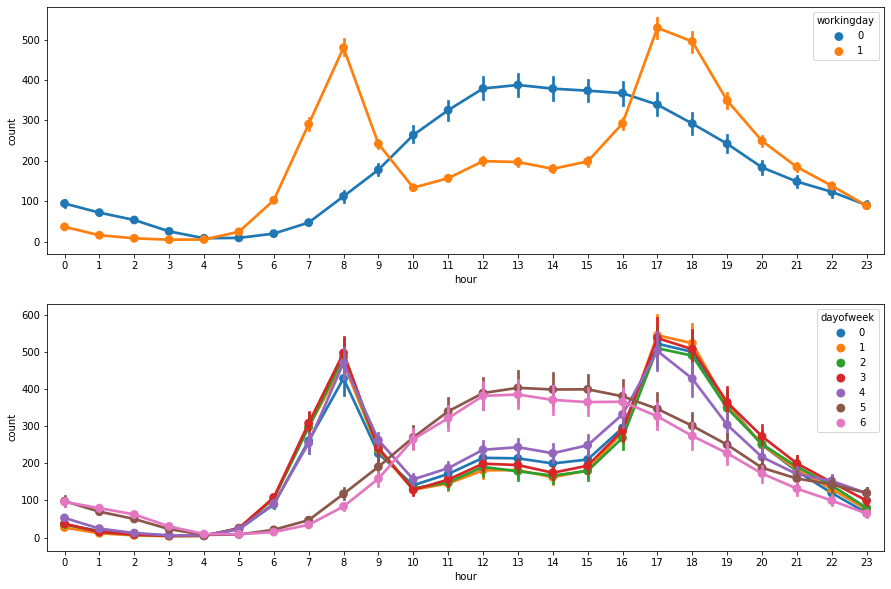

In [340]:
fig, (ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(15,10)
# 근무일인지 아닌지에 따른 시간대별 자전거 대여 수
sns.pointplot(data = df, x='hour', y='count', hue='workingday', ax=ax1)
# 요일 따른 시간대별 자전거 대여 수
sns.pointplot(data = df, x='hour', y='count', hue='dayofweek', ax=ax2)